In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import os
import random
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity


## Reading dataset

In [2]:
if not os.path.isfile("./data/NetflixRating.csv"):
    startTime=datetime.now()
    data=open("./Data/NetflixRatings.csv",mode="w")
    
    files=["./Data/combined_data_2.txt",'./Data/combined_data_4.txt']
    for file in files:
        print("Reading from file: "+str(file)+"...")
        with open(file) as f:
            
            for line in f:
                line=line.strip()
                
                if line.endswith(":"):
                    movieID=line.replace(":","")
                else:
                    row=[]
                    row=[x for x in line.split(",")]
                    row.insert(0,movieID)
                    data.write(",".join(row))
                    data.write("\n")
        print("Reading of file"+str(file)+" is completed\n")
    data.close()
    print("Total time taken" + str(datetime.now()-startTime))
    

Reading from file: ./Data/combined_data_2.txt...
Reading of file./Data/combined_data_2.txt is completed

Reading from file: ./Data/combined_data_4.txt...
Reading of file./Data/combined_data_4.txt is completed

Total time taken0:03:13.727466


In [3]:
if not os.path.isfile("./Data/NetflixData.pkl"):
    startTime=datetime.now()
    final_data=pd.read_csv("./Data/NetflixRatings.csv",sep=",",names=["MovieID","CustID","Ratings","Date"])
    final_data["Date"]=pd.to_datetime(final_data["Date"])
    final_data.sort_values(by="Date",inplace=True)
    print("Time taken for execturion of above code ="+str(datetime.now()-startTime))

In [4]:
if not os.path.isfile("./Data/NetflixData.pkl"):
    final_data.to_pickle("./Data/NetflixData.pkl")
else:
    final_data=pd.read_pickle("./Data/NetflixData.pkl")

In [5]:
final_data.head()

,MovieID,CustID,Ratings,Date
49557332,17064,510180,2,1999-11-11
46370047,16465,510180,3,1999-11-11
22463125,8357,510180,4,1999-11-11
35237815,14660,510180,2,1999-11-11
21262258,8079,510180,2,1999-11-11


In [6]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53825114 entries, 49557332 to 17495310
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   MovieID  int64         
 1   CustID   int64         
 2   Ratings  int64         
 3   Date     datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.0 GB


In [7]:
final_data.reset_index(inplace=True)

In [8]:
final_data.drop("index",axis=1,inplace=True)
final_data.head()

,MovieID,CustID,Ratings,Date
0,17064,510180,2,1999-11-11
1,16465,510180,3,1999-11-11
2,8357,510180,4,1999-11-11
3,14660,510180,2,1999-11-11
4,8079,510180,2,1999-11-11


In [9]:
print("Total Null values in data :\n ", final_data.isnull().sum())

Total Null values in data :
  MovieID    0
CustID     0
Ratings    0
Date       0
dtype: int64


In [10]:
duplicates=final_data.duplicated(["MovieID","CustID","Ratings"])
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


In [11]:
duplicates

0           False
1           False
2           False
3           False
4           False
            ...  
53825109    False
53825110    False
53825111    False
53825112    False
53825113    False
Length: 53825114, dtype: bool

In [12]:
if not os.path.isfile("./Data/TrainData.pkl"):
    final_data.iloc[:int(final_data.shape[0]*0.80)].to_pickle("./Data/TrainData.pkl")
    Train_data=pd.read_pickle('./Data/TrainData.pkl')
else:
    Train_data=pd.read_pickle("./Data/TrainData.pkl")
if not os.path.isfile("./Data/testData.pkl"):
    final_data.iloc[int(final_data.shape[0]*0.80):].to_pickle("./Data/TestData.pkl")
    Test_data=pd.read_pickle('./Data/TestData.pkl')
else:
    Test_data=pd.read_pickle("./Data/TestData.pkl")
    

In [13]:
Train_data.head()

,MovieID,CustID,Ratings,Date
0,17064,510180,2,1999-11-11
1,16465,510180,3,1999-11-11
2,8357,510180,4,1999-11-11
3,14660,510180,2,1999-11-11
4,8079,510180,2,1999-11-11


In [14]:
Test_data.reset_index(drop=True,inplace=True)
Test_data.head()

,MovieID,CustID,Ratings,Date
0,17405,1557557,4,2005-08-09
1,13462,2017421,4,2005-08-09
2,6475,934053,4,2005-08-09
3,6007,1156578,5,2005-08-09
4,5085,2311323,4,2005-08-09


In [15]:
def to_million(number):
    return str(number/10**6)+"M"

<ipython-input-16-3df54d8b8a95>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([to_million(num) for num in ax.get_yticks()])


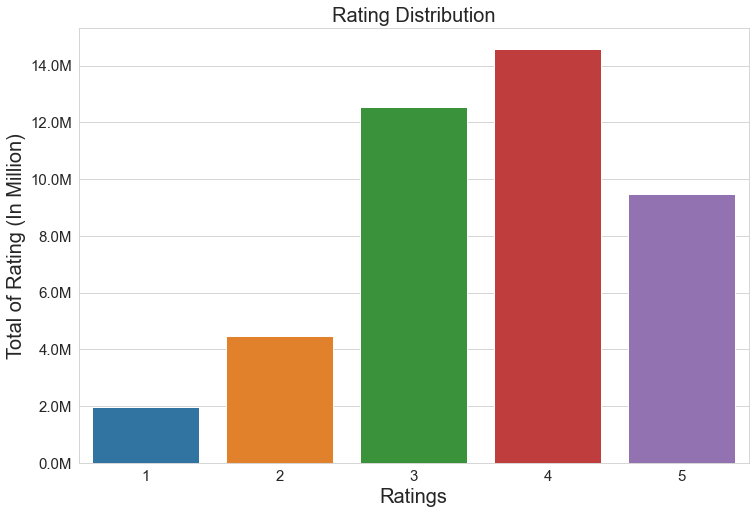

In [16]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Ratings",data=Train_data)
ax.set_yticklabels([to_million(num) for num in ax.get_yticks()])

plt.tick_params(labelsize=15)
plt.title("Rating Distribution",fontsize=20)
plt.xlabel("Ratings",fontsize=20)
plt.ylabel("Total of Rating (In Million)",fontsize=20)
plt.show()

In [17]:
Train_data["DayOfWeek"]=Train_data.Date.dt.day_name()

In [18]:
Train_data.head()

,MovieID,CustID,Ratings,Date,DayOfWeek
0,17064,510180,2,1999-11-11,Thursday
1,16465,510180,3,1999-11-11,Thursday
2,8357,510180,4,1999-11-11,Thursday
3,14660,510180,2,1999-11-11,Thursday
4,8079,510180,2,1999-11-11,Thursday


<ipython-input-19-19d905d69786>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([to_million(num) for num in ax.get_yticks()])


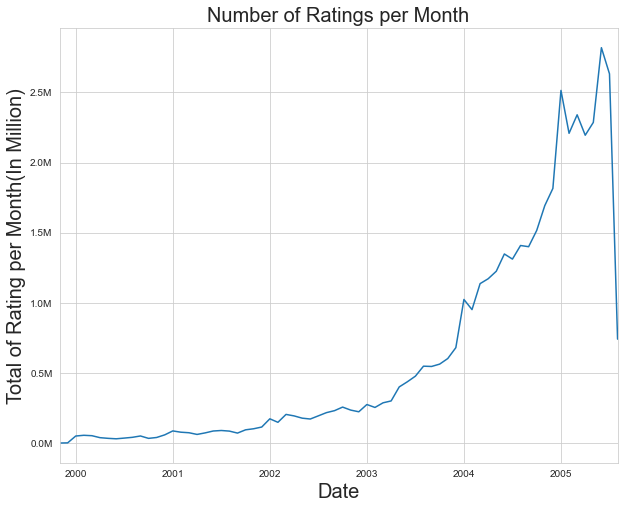

In [19]:
plt.figure(figsize=(10,8))
ax=Train_data.resample("M",on="Date")["Ratings"].count().plot()

ax.set_yticklabels([to_million(num) for num in ax.get_yticks()])
ax.set_title("Number of Ratings per Month",fontsize=20)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Total of Rating per Month(In Million)",fontsize=20)
plt.show()

In [20]:
moveis_rated_per_user=Train_data.groupby("CustID")["Ratings"].count().sort_values(ascending=False)

In [21]:
moveis_rated_per_user.head()

CustID
305344     8779
2439493    8126
387418     7884
1639792    4983
1461435    4846
Name: Ratings, dtype: int64

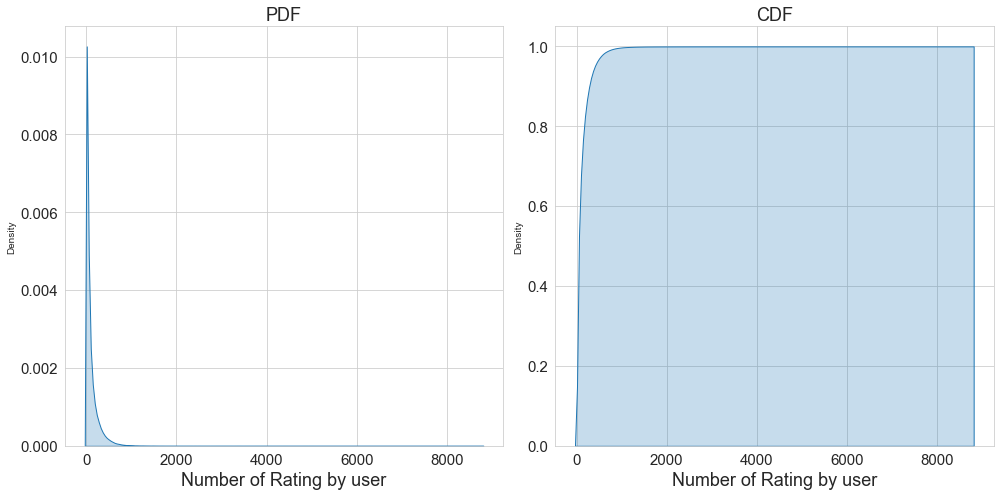

In [22]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(14,7))

sns.kdeplot(moveis_rated_per_user.values,shade=True,ax=axes[0])
axes[0].set_title("PDF",fontsize=18)
axes[0].set_xlabel("Number of Rating by user",fontsize=18)
axes[0].tick_params(labelsize=15)

sns.kdeplot(moveis_rated_per_user.values,shade=True,cumulative=True,ax=axes[1])
axes[1].set_title("CDF",fontsize=18)
axes[1].set_xlabel("Number of Rating by user",fontsize=18)
axes[1].tick_params(labelsize=15)

fig.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()


In [23]:
print("Information about movie ratings grouped by users:")
moveis_rated_per_user.describe()

Information about movie ratings grouped by users:


count    401901.00000
mean        107.14104
std         155.05350
min           1.00000
25%          19.00000
50%          48.00000
75%         133.00000
max        8779.00000
Name: Ratings, dtype: float64

In [24]:
quantiles=moveis_rated_per_user.quantile(np.arange(0,1.01,0.01))

In [25]:
import warnings
warnings.filterwarnings('ignore')

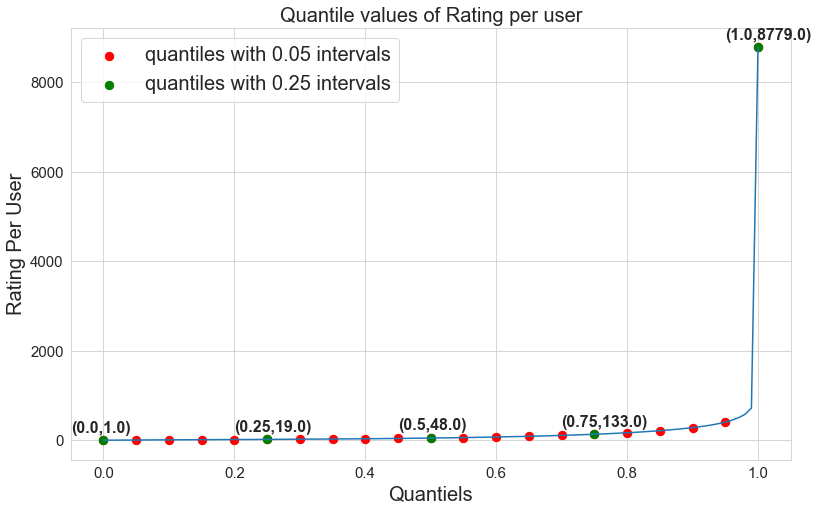

In [26]:
fig =plt.figure(figsize=(10,6))
axes=fig.add_axes([0.1,0.1,1,1])
axes.set_title("Quantile values of Rating per user",fontsize=20)
axes.set_xlabel("Quantiels",fontsize=20)
axes.set_ylabel("Rating Per User",fontsize=20)
axes.plot(quantiles)

plt.scatter(x=quantiles.index[::5],y=quantiles.values[::5],c="red",s=70,label="quantiles with 0.05 intervals")
plt.scatter(x=quantiles.index[::25],y=quantiles.values[::25],c="green",s=70,label="quantiles with 0.25 intervals")
plt.legend(loc="upper left",fontsize=20)

for x,y in zip(quantiles.index[::25],quantiles.values[::25]):
    plt.annotate(s='({},{})'.format(x,y),xy=(x,y),fontweight="bold",fontsize=16,xytext=(x-0.05,y+180))

axes.tick_params(labelsize=15)

In [27]:
quantiles[::5]

0.00       1.0
0.05       4.0
0.10       8.0
0.15      12.0
0.20      15.0
0.25      19.0
0.30      23.0
0.35      27.0
0.40      33.0
0.45      40.0
0.50      48.0
0.55      59.0
0.60      72.0
0.65      88.0
0.70     108.0
0.75     133.0
0.80     166.0
0.85     213.0
0.90     281.0
0.95     404.0
1.00    8779.0
Name: Ratings, dtype: float64

In [28]:
print("Total number of rating below 75th Percentile ->" + str(sum(moveis_rated_per_user<=133)))
print("Total number of rating above 75th Percentile ->" + str(sum(moveis_rated_per_user>133)))

Total number of rating below 75th Percentile ->301857
Total number of rating above 75th Percentile ->100044


## Analysis Per Movie

In [29]:
rating_per_movie=Train_data.groupby("MovieID")["Ratings"].count().sort_values(ascending=False)

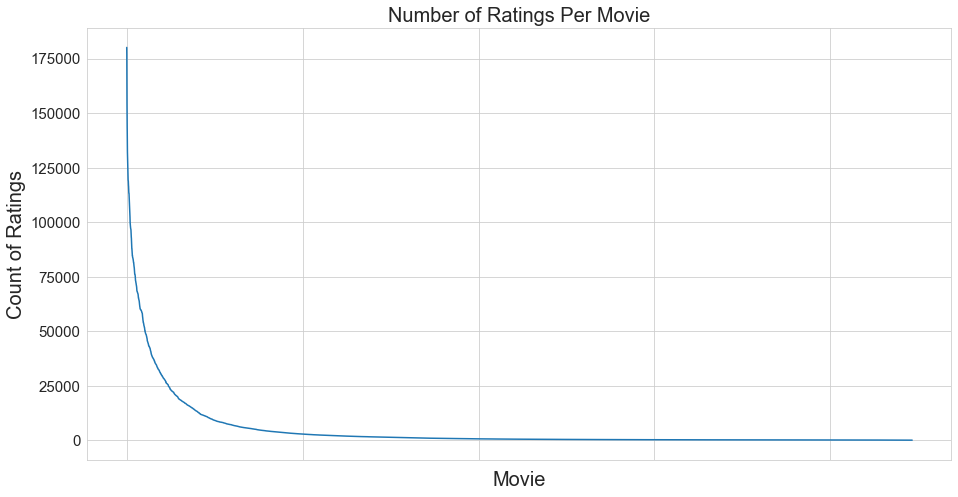

In [30]:
fig = plt.figure(figsize = (12, 6))
axes = fig.add_axes([0.1,0.1,1,1])
plt.title("Number of Ratings Per Movie", fontsize = 20)
plt.xlabel("Movie", fontsize = 20)
plt.ylabel("Count of Ratings", fontsize = 20)
plt.plot(rating_per_movie.values)
plt.tick_params(labelsize = 15)
axes.set_xticklabels([])
plt.show()

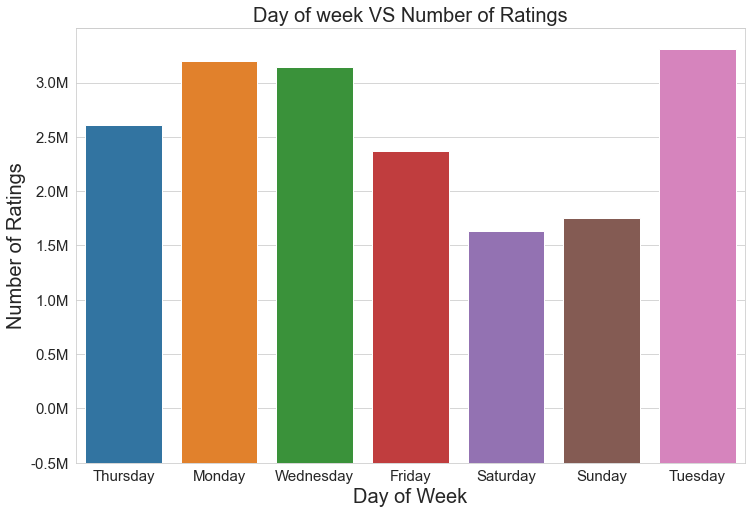

In [31]:
fig = plt.figure(figsize = (12, 8))

axes = sns.countplot(x = "DayOfWeek", data = Train_data)
axes.set_title("Day of week VS Number of Ratings", fontsize = 20)
axes.set_xlabel("Day of Week", fontsize = 20)
axes.set_ylabel("Number of Ratings", fontsize = 20)
axes.set_yticklabels([to_million(num) for num in ax.get_yticks()])
axes.tick_params(labelsize = 15)

plt.show()

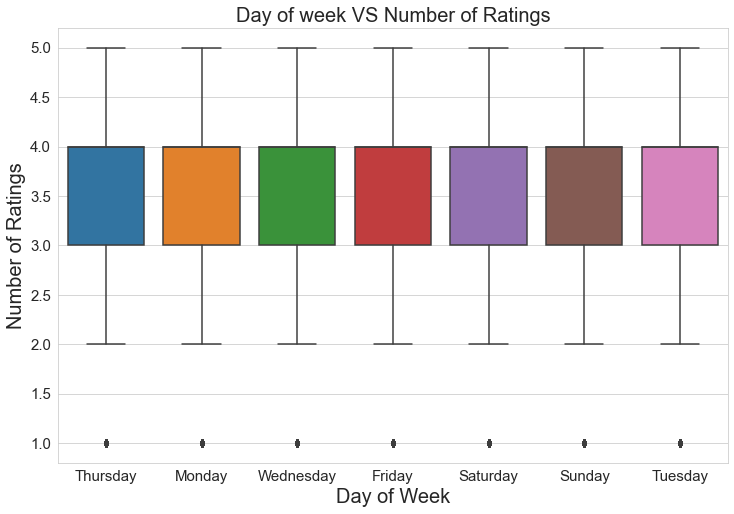

In [32]:
fig = plt.figure(figsize = (12, 8))

axes = sns.boxplot(x = "DayOfWeek", y = "Ratings", data = Train_data)
axes.set_title("Day of week VS Number of Ratings", fontsize = 20)
axes.set_xlabel("Day of Week", fontsize = 20)
axes.set_ylabel("Number of Ratings", fontsize = 20)
axes.tick_params(labelsize = 15)

plt.show()

In [33]:
average_ratings_dayofweek=Train_data.groupby("DayOfWeek")["Ratings"].mean()
average_ratings_dayofweek

DayOfWeek
Friday       3.589555
Monday       3.577235
Saturday     3.595120
Sunday       3.596637
Thursday     3.583570
Tuesday      3.574852
Wednesday    3.585002
Name: Ratings, dtype: float64

In [34]:
startTime = datetime.now()
print("Creating USER_ITEM sparse matrix for train Data")
if os.path.isfile("./Data/TrainUISparseData.npz"):
    print("Sparse Data is already present in your disk, no need to create further. Loading Sparse Matrix")
    TrainUISparseData = sparse.load_npz("./Data/TrainUISparseData.npz")
    print("Shape of Train Sparse matrix = "+str(TrainUISparseData.shape))
    
else:
    print("We are creating sparse data")
    TrainUISparseData = sparse.csr_matrix((Train_data.Ratings, (Train_data.CustID, Train_data.MovieID)))
    print("Creation done. Shape of sparse matrix = "+str(TrainUISparseData.shape))
    print("Saving it into disk for furthur usage.")
    sparse.save_npz("./Data/TrainUISparseData.npz", TrainUISparseData)
    print("Done\n")

print(datetime.now() - startTime)

Creating USER_ITEM sparse matrix for train Data
Sparse Data is already present in your disk, no need to create further. Loading Sparse Matrix
Shape of Train Sparse matrix = (2649430, 17771)
0:00:01.410659


In [35]:
startTime = datetime.now()
print("Creating USER_ITEM sparse matrix for test Data")
if os.path.isfile("./Data/TestUISparseData.npz"):
    print("Sparse Data is already present in your disk, no need to create further. Loading Sparse Matrix")
    TestUISparseData = sparse.load_npz("./Data/TestUISparseData.npz")
    print("Shape of Test Sparse matrix = "+str(TestUISparseData.shape))
    
else:
    print("We are creating sparse data")
    TestUISparseData = sparse.csr_matrix((Test_data.Ratings, (Test_data.CustID, Test_data.MovieID)))
    print("Creation done. Shape of sparse matrix = "+str(TestUISparseData.shape))
    print("Saving it into disk for furthur usage.")
    sparse.save_npz("./Data/TestUISparseData.npz", TestUISparseData)
    print("Done\n")

print(datetime.now() - startTime)

Creating USER_ITEM sparse matrix for test Data
Sparse Data is already present in your disk, no need to create further. Loading Sparse Matrix
Shape of Test Sparse matrix = (2649430, 17771)
0:00:00.654829


In [36]:
rows,cols = TrainUISparseData.shape
presentElements = TrainUISparseData.count_nonzero()

print("Sparsity Of Train matrix : {}% ".format((1-(presentElements/(rows*cols)))*100))

Sparsity Of Train matrix : 99.90854433187319% 


In [37]:
rows,cols = TestUISparseData.shape
presentElements = TestUISparseData.count_nonzero()

print("Sparsity Of Test matrix : {}% ".format((1-(presentElements/(rows*cols)))*100))

Sparsity Of Test matrix : 99.97713608243731% 


## Finding Global average of all movie ratings, Average rating per user, and Average rating per movie

In [38]:
def getAverageRatings(sparseMatrix, if_user):
    ax= 1 if if_user else 0
    sumOfRatings=sparseMatrix.sum(axis=ax).A1
    
    noOfRatings = (sparseMatrix!=0).sum(axis = ax).A1  
    
    rows, cols = sparseMatrix.shape
    averageRatings = {i: sumOfRatings[i]/noOfRatings[i] for i in range(rows if if_user else cols) if noOfRatings[i]!=0}
    return averageRatings

In [39]:
Global_Average_Rating = TrainUISparseData.sum()/TrainUISparseData.count_nonzero()
print("Global Average Rating {}".format(Global_Average_Rating))

Global Average Rating 3.5844935859517806


In [40]:
AvgRatingUser = getAverageRatings(TrainUISparseData, True)
print("Average rating of user 25 = {}".format(AvgRatingUser[25]))

Average rating of user 25 = 3.0


In [41]:
AvgRatingMovie = getAverageRatings(TrainUISparseData, False)
print("Average rating of movie 4500 = {}".format(AvgRatingMovie[4500]))

Average rating of movie 4500 = 3.28


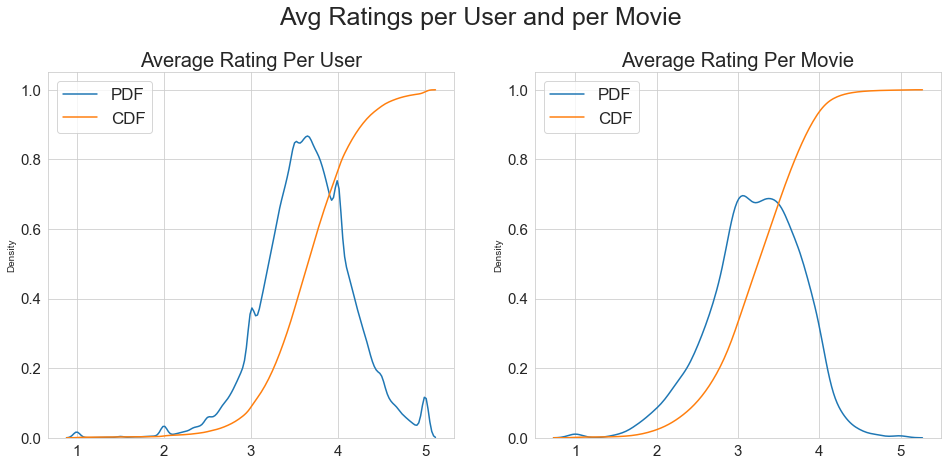

In [42]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 7))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=25)

user_average = [rats for rats in AvgRatingUser.values()]
sns.distplot(user_average, hist = False, ax = axes[0], label = "PDF")
sns.kdeplot(user_average, cumulative = True, ax = axes[0], label = "CDF")
axes[0].set_title("Average Rating Per User", fontsize=20)
axes[0].tick_params(labelsize = 15)
axes[0].legend(loc='upper left', fontsize = 17)

movie_average = [ratm for ratm in AvgRatingMovie.values()]
sns.distplot(movie_average, hist = False, ax = axes[1], label = "PDF")
sns.kdeplot(movie_average, cumulative = True, ax = axes[1], label = "CDF")
axes[1].set_title("Average Rating Per Movie", fontsize=20)
axes[1].tick_params(labelsize = 15)
axes[1].legend(loc='upper left', fontsize = 17)

plt.subplots_adjust(wspace=0.2, top=0.85)
plt.show()

# Cold Start Problem
## Cold Start Problem with Users

In [43]:
total_users=len(np.unique(final_data["CustID"]))
train_users=len(AvgRatingUser)
uncommonUsers=total_users-train_users

print("Total number of users = {}".format(total_users))
print("Number of Users in train data= {}".format(train_users))
print("Number of Users not present in train data = {}({}%)".format(uncommonUsers, np.round((uncommonUsers/total_users)*100), 2))

Total number of users = 478723
Number of Users in train data= 401901
Number of Users not present in train data = 76822(16.0%)


In [44]:
total_movies = len(np.unique(final_data["MovieID"]))
train_movies = len(AvgRatingMovie)
uncommonMovies = total_movies - train_movies
                  
print("Total number of Movies = {}".format(total_movies))
print("Number of Movies in train data= {}".format(train_movies))
print("Number of Movies not present in train data = {}({}%)".format(uncommonMovies, np.round((uncommonMovies/total_movies)*100), 2))

Total number of Movies = 9114
Number of Movies in train data= 8931
Number of Movies not present in train data = 183(2.0%)


# Computing Similarity Matrices
## Computing User-User Similarity Matrix

In [45]:
row_index, col_index = TrainUISparseData.nonzero()
rows = np.unique(row_index)
for i in rows[:100]:
    print(i)

6
7
10
25
33
42
59
79
83
87
94
97
131
134
142
149
158
168
169
178
183
188
189
192
195
199
201
242
247
248
261
265
266
267
268
283
291
296
298
299
301
302
304
305
307
308
310
312
314
330
331
333
352
363
368
369
379
383
384
385
392
413
416
424
437
439
440
442
453
462
470
471
477
478
479
481
485
490
491
492
495
508
515
517
527
529
536
540
544
546
550
561
576
585
592
596
602
609
614
616


In [46]:
def getUser_UserSimilarity(sparseMatrix,top=100):
    startTimestamp20=datetime.now()
    
    row_index,col_index=sparseMatrix.nonzero()
    
    rows=np.unique(row_index)
    similarMatrix=np.zeros(61700).reshape(617,100)
    
    timeTaken= []
    howManyDone=0
    
    for row in rows[:top]:
        howManyDone+=1
        startTimestamp=datetime.now().timestamp()
        sim=cosine_similarity(sparseMatrix.getrow(row),sparseMatrix).ravel()
        top100_similar_indices=sim.argsort()[-top:]
        top100_similar = sim[top100_similar_indices]
        similarMatrix[row] = top100_similar
        timeforOne = datetime.now().timestamp() - startTimestamp
        timeTaken.append(timeforOne)
        if howManyDone % 20 == 0:
            print("Time elapsed for {} users = {}sec".format(howManyDone, (datetime.now() - startTimestamp20)))
    print("Average Time taken to compute similarity matrix for 1 user = "+str(sum(timeTaken)/len(timeTaken))+"seconds")
    
    fig = plt.figure(figsize = (12,8))
    plt.plot(timeTaken, label = 'Time Taken For Each User')
    plt.plot(np.cumsum(timeTaken), label='Cumulative Time')
    plt.legend(loc='upper left', fontsize = 15)
    plt.xlabel('Users', fontsize = 20)
    plt.ylabel('Time(Seconds)', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.show()
    
    return similarMatrix

Time elapsed for 20 users = 0:00:38.501206sec
Time elapsed for 40 users = 0:01:16.498813sec
Time elapsed for 60 users = 0:01:51.317434sec
Time elapsed for 80 users = 0:02:42.906302sec
Time elapsed for 100 users = 0:03:25.743244sec
Average Time taken to compute similarity matrix for 1 user = 2.0424892473220826seconds


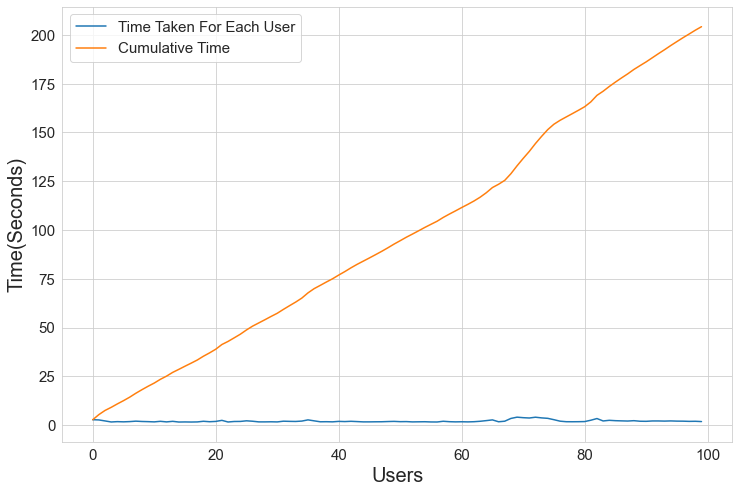

In [47]:
simMatrix = getUser_UserSimilarity(TrainUISparseData, 100)

# Movie-Movie Similarity Matrix

In [48]:
start = datetime.now()

if not os.path.isfile("./Data/m_m_similarity.npz"):
    print("Movie-Movie Similarity file does not exist in your disk. Creating Movie-Movie Similarity Matrix...")
    
    m_m_similarity = cosine_similarity(TrainUISparseData.T, dense_output = False)
    print("Done")
    print("Dimension of Matrix = {}".format(m_m_similarity.shape))
    print("Storing the Movie Similarity matrix on disk for further usage")
    sparse.save_npz("./Data/m_m_similarity.npz", m_m_similarity)
else:
    print("File exists in the disk. Loading the file...")
    m_m_similarity = sparse.load_npz("./Data/m_m_similarity.npz")
    print("Dimension of Matrix = {}".format(m_m_similarity.shape))
    
print(datetime.now() - start)

File exists in the disk. Loading the file...
Dimension of Matrix = (17771, 17771)
0:00:05.227068


In [49]:
movie_ids=np.unique(m_m_similarity.nonzero())

similar_movies_dict=dict()
for movie in movie_ids:
    smlr=np.argsort(-m_m_similarity[movie].toarray().ravel())[1:100]
    similar_movies_dict[movie]=smlr

In [50]:

movie_titles_df = pd.read_csv("./Data/movie_titles.csv",sep = ",", header = None, names=['MovieID', 'Year_of_Release', 'Movie_Title'], index_col = "MovieID", encoding = "iso8859_2") 

In [51]:
movie_titles_df.head()

,Year_of_Release,Movie_Title
MovieID,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [52]:
movieID_GR = 17765

print("Name of the movie -------> "+str(movie_titles_df.loc[movieID_GR][1]))

print("Number of ratings by users for movie {} is {}".format(movie_titles_df.loc[movieID_GR][1], TrainUISparseData[:,movieID_GR].getnnz()))

print("Number of similar movies to {} is {}".format(movie_titles_df.loc[movieID_GR][1], m_m_similarity[movieID_GR].count_nonzero()))

Name of the movie -------> Godzilla's Revenge
Number of ratings by users for movie Godzilla's Revenge is 285
Number of similar movies to Godzilla's Revenge is 8863


In [53]:
all_similar=sorted(m_m_similarity[movieID_GR].toarray().ravel(),reverse=True)[1:]

similar_100=all_similar[:101]

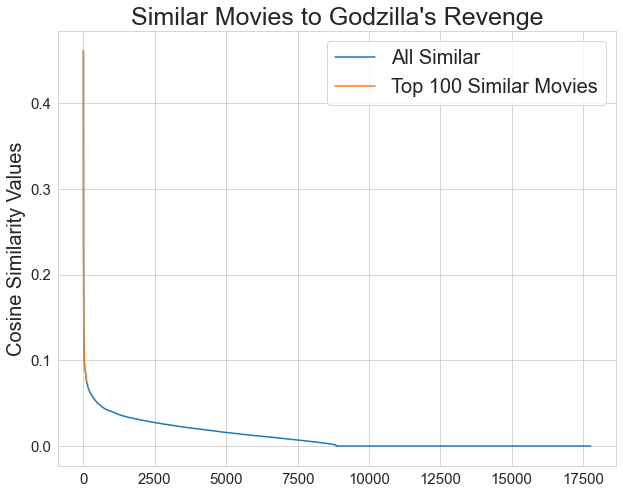

In [54]:
plt.figure(figsize = (10, 8))
plt.plot(all_similar, label = "All Similar")
plt.plot(similar_100, label = "Top 100 Similar Movies")
plt.title("Similar Movies to Godzilla's Revenge", fontsize = 25)
plt.ylabel("Cosine Similarity Values", fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [55]:
movie_titles_df.loc[similar_movies_dict[movieID_GR][:10]]

,Year_of_Release,Movie_Title
MovieID,,
15810,1964.0,Godzilla vs. Mothra
5907,1956.0,Godzilla: King of the Monsters
14623,1971.0,Godzilla vs. Hedorah
8233,1968.0,Destroy All Monsters
17746,1991.0,Godzilla & Mothra: Battle for Earth / Vs. King...
15123,1995.0,Godzilla vs. Destroyah / Godzilla vs. Space Go...
8601,1997.0,Rebirth of Mothra 1 & 2: Double Feature
8656,1993.0,Godzilla vs. Mechagodzilla II
7140,2003.0,Godzilla: Tokyo S.O.S.


# Machine Learning Models

In [56]:
def get_sample_sparse_matrix(sparseMatrix, n_users,n_movies):
    startTime=datetime.now()
    users, movies, ratings=sparse.find(sparseMatrix)
    uniq_users=np.unique(users)
    uniq_movies=np.unique(movies)
    
    np.random.seed(15)
    userS=np.random.choice(uniq_users,n_users,replace=False)
    movieS=np.random.choice(uniq_movies,n_movies,replace=False)
    mask=np.logical_and(np.isin(users,userS),np.isin(movies,movieS))
    sparse_sample=sparse.csr_matrix((ratings[mask],(users[mask],movies[mask])),
                                  shape=(max(userS)+1,max(movieS)+1))
    print("Sparse Matrix creation done. Saving it for later use.")
    sparse.save_npz(path, sparse_sample)
    print("Done")
    print("Shape of Sparse Sampled Matrix = "+str(sparse_sample.shape))
    
    print(datetime.now() - start)
    return sparse_sample

In [57]:
path = "./Data/TrainUISparseData_Sample.npz"
if not os.path.isfile(path):
    print("Sample sparse matrix is not present in the disk. We are creating it...")
    train_sample_sparse = get_sample_sparse_matrix(TrainUISparseData, 4000, 400)
else:
    print("File is already present in the disk. Loading the file...")
    train_sample_sparse = sparse.load_npz(path)
    print("File loading done.")
    print("Shape of Train Sample Sparse Matrix = "+str(train_sample_sparse.shape))

File is already present in the disk. Loading the file...
File loading done.
Shape of Train Sample Sparse Matrix = (2649117, 17764)


# For Test Data

In [58]:
path = "./Data/TestUISparseData_Sample.npz"
if not os.path.isfile(path):
    print("Sample sparse matrix is not present in the disk. We are creating it...")
    test_sample_sparse = get_sample_sparse_matrix(TestUISparseData, 2000, 200)
else:
    print("File is already present in the disk. Loading the file...")
    test_sample_sparse = sparse.load_npz(path)
    print("File loading done.")
    print("Shape of Test Sample Sparse Matrix = "+str(test_sample_sparse.shape))

File is already present in the disk. Loading the file...
File loading done.
Shape of Test Sample Sparse Matrix = (2647588, 17689)


## Finding Global Average of all movie ratings, Average rating per User, and Average rating per Movie (from sampled train)

In [59]:
print("Global average of all movies ratings in Train Sample Sparse is {}".format(np.round((train_sample_sparse.sum()/train_sample_sparse.count_nonzero()), 2)))

Global average of all movies ratings in Train Sample Sparse is 3.58


In [60]:
globalAvgMovies = getAverageRatings(train_sample_sparse, False)
print("Average move rating for movie 14890 is {}".format(globalAvgMovies[14890]))

Average move rating for movie 14890 is 3.2870967741935484


In [61]:
globalAvgUsers = getAverageRatings(train_sample_sparse, True)
print("Average user rating for user 16879 is {}".format(globalAvgMovies[16879]))

Average user rating for user 16879 is 3.738095238095238


## Featurizing data

In [62]:
print("No of ratings in Our Sampled train matrix is : {}".format(train_sample_sparse.count_nonzero()))
print("No of ratings in Our Sampled test matrix is : {}".format(test_sample_sparse.count_nonzero()))

No of ratings in Our Sampled train matrix is : 19214
No of ratings in Our Sampled test matrix is : 1150


In [63]:
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(train_sample_sparse)

In [64]:
if os.path.isfile("./Data/Train_Regression.csv"):
    print("File is already present in your disk. You do not have to prepare it again.")
else:
    startTime = datetime.now()
    print("Preparing Train csv file for {} rows".format(len(sample_train_ratings)))
    with open("./Data/Train_Regression.csv", mode = "w") as data:
        count = 0
        for user, movie, rating in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            row = list()
            row.append(user)  #appending user ID
            row.append(movie) #appending movie ID
            row.append(train_sample_sparse.sum()/train_sample_sparse.count_nonzero()) #appending global average rating

#----------------------------------Ratings given to "movie" by top 5 similar users with "user"--------------------#
            similar_users = cosine_similarity(train_sample_sparse[user], train_sample_sparse).ravel()
            similar_users_indices = np.argsort(-similar_users)[1:]
            similar_users_ratings = train_sample_sparse[similar_users_indices, movie].toarray().ravel()
            top_similar_user_ratings = list(similar_users_ratings[similar_users_ratings != 0][:5])
            top_similar_user_ratings.extend([globalAvgMovies[movie]]*(5-len(top_similar_user_ratings)))
            #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "movie" average
            #rating. Let say only 3 out of 5 ratings are available then rest 2 will be "movie" average rating.
            row.extend(top_similar_user_ratings)
            
 #----------------------------------Ratings given by "user" to top 5 similar movies with "movie"------------------#
            similar_movies = cosine_similarity(train_sample_sparse[:,movie].T, train_sample_sparse.T).ravel()
            similar_movies_indices = np.argsort(-similar_movies)[1:]
            similar_movies_ratings = train_sample_sparse[user, similar_movies_indices].toarray().ravel()
            top_similar_movie_ratings = list(similar_movies_ratings[similar_movies_ratings != 0][:5])
            top_similar_movie_ratings.extend([globalAvgUsers[user]]*(5-len(top_similar_movie_ratings)))
            #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "user" average
            #rating. Let say only 3 out of 5 ratings are available then rest 2 will be "user" average rating.
            row.extend(top_similar_movie_ratings)
            
 #----------------------------------Appending "user" average, "movie" average & rating of "user""movie"-----------#
            row.append(globalAvgUsers[user])
            row.append(globalAvgMovies[movie])
            row.append(rating)
            
#-----------------------------------Converting rows and appending them as comma separated values to csv file------#
            data.write(",".join(map(str, row)))
            data.write("\n")
    
            count += 1
            if count % 2000 == 0:
                print("Done for {}. Time elapsed: {}".format(count, (datetime.now() - startTime)))
                
    print("Total Time for {} rows = {}".format(len(sample_train_ratings), (datetime.now() - startTime)))

File is already present in your disk. You do not have to prepare it again.


In [65]:
Train_Reg = pd.read_csv("./Data/Train_Regression.csv", names = ["User_ID", "Movie_ID", "Global_Average", "SUR1", "SUR2", "SUR3", "SUR4", "SUR5", "SMR1",
                                                                 "SMR2", "SMR3", "SMR4", "SMR5", "User_Average", "Movie_Average", "Rating"])
Train_Reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating
0,180921,4512,3.582804,3.0,2.0,1.0,2.0,1.0,4.0,3.0,4.0,2.0,2.0,2.900000,2.5,1
1,210185,4512,3.582804,2.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.388889,2.5,2
2,218038,4512,3.582804,2.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,5.0,4.250000,2.5,4
3,221936,4512,3.582804,4.0,2.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,3.0,3.458333,2.5,3
4,370736,4512,3.582804,2.0,4.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,4.038462,2.5,4


In [66]:
print("Number of nan Values ="+str(Train_Reg.isnull().sum().sum()))

Number of nan Values =0


In [67]:
print("Shape of Train DataFrame = {}".format(Train_Reg.shape))

Shape of Train DataFrame = (19214, 16)


# Featurizing Test Data

In [68]:
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(test_sample_sparse)

In [69]:
if os.path.isfile("./Data/Test_Regression.csv"):
    print("File is already present in your disk. You do not have to prepare it again.")
else:
    startTime = datetime.now()
    print("Preparing Test csv file for {} rows".format(len(sample_test_ratings)))
    with open("./Data/Test_Regression.csv", mode = "w") as data:
        count = 0
        for user, movie, rating in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            row = list()
            row.append(user)  #appending user ID
            row.append(movie) #appending movie ID
            row.append(train_sample_sparse.sum()/train_sample_sparse.count_nonzero()) #appending global average rating

#-----------------------------Ratings given to "movie" by top 5 similar users with "user"-------------------------#
            try:
                similar_users = cosine_similarity(train_sample_sparse[user], train_sample_sparse).ravel()
                similar_users_indices = np.argsort(-similar_users)[1:]
                similar_users_ratings = train_sample_sparse[similar_users_indices, movie].toarray().ravel()
                top_similar_user_ratings = list(similar_users_ratings[similar_users_ratings != 0][:5])
                top_similar_user_ratings.extend([globalAvgMovies[movie]]*(5-len(top_similar_user_ratings)))
                #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "movie" 
                #average rating. Let say only 3 out of 5 ratings are available then rest 2 will be "movie" average rating.
                row.extend(top_similar_user_ratings)
            #########Cold Start Problem, for a new user or a new movie#########    
            except(IndexError, KeyError):
                global_average_train_rating = [train_sample_sparse.sum()/train_sample_sparse.count_nonzero()]*5
                row.extend(global_average_train_rating)
            except:
                raise
                
 #-----------------------------Ratings given by "user" to top 5 similar movies with "movie"-----------------------#
            try:
                similar_movies = cosine_similarity(train_sample_sparse[:,movie].T, train_sample_sparse.T).ravel()
                similar_movies_indices = np.argsort(-similar_movies)[1:]
                similar_movies_ratings = train_sample_sparse[user, similar_movies_indices].toarray().ravel()
                top_similar_movie_ratings = list(similar_movies_ratings[similar_movies_ratings != 0][:5])
                top_similar_movie_ratings.extend([globalAvgUsers[user]]*(5-len(top_similar_movie_ratings)))
                #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "user" 
                #average rating. Let say only 3 out of 5 ratings are available then rest 2 will be "user" average rating.
                row.extend(top_similar_movie_ratings)
            #########Cold Start Problem, for a new user or a new movie#########
            except(IndexError, KeyError):
                global_average_train_rating = [train_sample_sparse.sum()/train_sample_sparse.count_nonzero()]*5
                row.extend(global_average_train_rating)
            except:
                raise
                
 #-----------------------------Appending "user" average, "movie" average & rating of "user""movie"----------------#
            try:        
                row.append(globalAvgUsers[user])
            except (KeyError):
                global_average_train_rating = train_sample_sparse.sum()/train_sample_sparse.count_nonzero()
                row.append(global_average_train_rating)
            except:
                raise
                
            try:
                row.append(globalAvgMovies[movie])
            except(KeyError):
                global_average_train_rating = train_sample_sparse.sum()/train_sample_sparse.count_nonzero()
                row.append(global_average_train_rating)
            except:
                raise
                
            row.append(rating)
            
#------------------------------Converting rows and appending them as comma separated values to csv file-----------#
            data.write(",".join(map(str, row)))
            data.write("\n")
    
            count += 1
            if count % 100 == 0:
                print("Done for {}. Time elapsed: {}".format(count, (datetime.now() - startTime)))
                
    print("Total Time for {} rows = {}".format(len(sample_test_ratings), (datetime.now() - startTime)))

File is already present in your disk. You do not have to prepare it again.


In [70]:
Test_reg=pd.read_csv("./Data/Test_Regression.csv",names=["User_ID", "Movie_ID", "Global_Average", "SUR1", "SUR2", "SUR3", "SUR4", "SUR5", "SMR1",
                                                                 "SMR2", "SMR3", "SMR4", "SMR5", "User_Average", "Movie_Average", "Rating"])

In [71]:
Test_reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating
0,464626,4614,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3
1,1815614,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3
2,2298717,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,5
3,2532402,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,4
4,2027,4798,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,5


In [72]:
print("Number of nan Values = "+str(Test_reg.isnull().sum().sum()))

Number of nan Values = 0


In [73]:
print("Shape of Test Dataframe ={}".format(Test_reg.shape))

Shape of Test Dataframe =(1150, 16)


# Transforming Data for Surprise Models
## Transforming Train Data

In [74]:
Train_Reg[['User_ID', 'Movie_ID', 'Rating']].head(5)

,User_ID,Movie_ID,Rating
0,180921,4512,1
1,210185,4512,2
2,218038,4512,4
3,221936,4512,3
4,370736,4512,4


In [75]:
import xgboost as xgb
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV

# Transforming Test Data

In [76]:
reader=Reader(rating_scale=(1,5))
data=Dataset.load_from_df(Train_Reg[["User_ID","Movie_ID","Rating"]],reader)
trainset=data.build_full_trainset()

In [77]:
testset = list(zip(Test_reg["User_ID"].values, Test_reg["Movie_ID"].values, Test_reg["Rating"].values))
testset[:5]

[(464626, 4614, 3),
 (1815614, 4627, 3),
 (2298717, 4627, 5),
 (2532402, 4627, 4),
 (2027, 4798, 5)]

# Applying Machine Learning Models

In [78]:
error_table = pd.DataFrame(columns = ["Model", "Train RMSE", "Train MAPE", "Test RMSE", "Test MAPE"])
model_train_evaluation = dict()
model_test_evaluation = dict()

In [114]:
def make_table(model_name,rmse_train, mape_train, rmse_test, mape_test):
    global error_table
    
    error_table=error_table.append(pd.DataFrame([[model_name, rmse_train,mape_train,rmse_test,mape_test]],columns =["Model","Train RMSE",
                                                                                                                    "Train MAPE", "Test RMSE", "Test MAPE"]))
    error_table.reset_index(drop=True, inplace=True)

# Utility Functions for Regression Models

In [139]:
from sklearn.metrics import mean_squared_error

In [140]:
def error_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(abs((y_true - y_pred)/y_true))*100
    return rmse, mape

In [141]:
def train_test_xgboost(x_train,x_test,y_train,t_test, model_name):
    startTime=datetime.now()
    train_result=dict()
    test_result=dict()
    
    clf=xgb.XGBRegressor(n_estimators=100,silent=True,n_jobs=10)
    clf.fit(x_train,y_train)
    
    print("-"*50)
    print("TRAIN DATA")
    y_pred_train=clf.predict(x_train)
    rmse_train, mape_train =error_metrics(y_train,y_pred_train)
    print("RMSE = {}".format(rmse_train))
    print("MAPE = {}".format(mape_train))
    print("-"*50)
    train_result = {"RMSE": rmse_train, "MAPE": mape_train, "Prediction": y_pred_train}
    
    print("TEST DATA")
    y_pred_test=clf.predict(x_test)
    rmse_test, mape_test=error_metrics(y_test,y_pred_test)
    print("RMSE = {}".format(rmse_test))
    print("MAPE = {}".format(mape_test))
    print("-"*50)
    test_result = {"RMSE": rmse_test, "MAPE": mape_test, "Prediction": y_pred_test}
        
    print("Time Taken = "+str(datetime.now() - startTime))
    
    plot_importance(xgb,clf)
    make_table(model_name,rmse_train,mape_train,rmse_test,mape_test)
    
    return train_result, test_result

In [142]:
def plot_importance(model,clf):
    fig = plt.figure(figsize = (8, 6))
    ax = fig.add_axes([0,0,1,1])
    model.plot_importance(clf, ax = ax, height = 0.3)
    plt.xlabel("F Score", fontsize = 20)
    plt.ylabel("Features", fontsize = 20)
    plt.title("Feature Importance", fontsize = 20)
    plt.tick_params(labelsize = 15)
    
    plt.show()    

# Utility Functions for Surprise Models

In [143]:
def get_ratings(predictions):
    actual=np.array([pred.r_ui for pred in predictions])
    predicted=np.array([pred.est for pred  in predictions])
    return actual,predicted

In [144]:
def get_error(predictions):
    actual, predicted =get_ratings(predictions)
    rmse=np.sqrt(mean_squared_error(actual, predicted))
    mape=np.mean(abs((actual-predicted)/actual))*100
    return rmse, mape

In [145]:
my_seed=15
random.seed(my_seed)
np.random.seed(my_seed)

def run_surprise(algo, trainset, testset, model_name):
    startTime=datetime.now()
    
    train=dict()
    test=dict()
    
    algo.fit(trainset)
    
#-----------------Evaluating Train Data------------------#
    print("-"*50)
    print("TRAIN DATA")
    train_pred = algo.test(trainset.build_testset())

    train_actual, train_predicted = get_ratings(train_pred)
    train_rmse, train_mape = get_error(train_pred)
    print("RMSE = {}".format(train_rmse))
    print("MAPE = {}".format(train_mape))
    print("-"*50)
    train = {"RMSE": train_rmse, "MAPE": train_mape, "Prediction": train_predicted}
    
#-----------------Evaluating Test Data------------------#
    print("TEST DATA")
    test_pred = algo.test(testset)

    test_actual, test_predicted = get_ratings(test_pred)
    test_rmse, test_mape = get_error(test_pred)
    print("RMSE = {}".format(test_rmse))
    print("MAPE = {}".format(test_mape))
    print("-"*50)
    test = {"RMSE": test_rmse, "MAPE": test_mape, "Prediction": test_predicted}
    
    print("Time Taken = "+str(datetime.now() - startTime))
    
    make_table(model_name, train_rmse, train_mape, test_rmse, test_mape)
    
    return train, test   

# XGBoost 13 features

[11:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


--------------------------------------------------
TRAIN DATA
RMSE = 0.5949516863142196
MAPE = 16.334639489650726
--------------------------------------------------
TEST DATA
RMSE = 1.2562482311411585
MAPE = 30.663328753001164
--------------------------------------------------
Time Taken = 0:00:01.243248


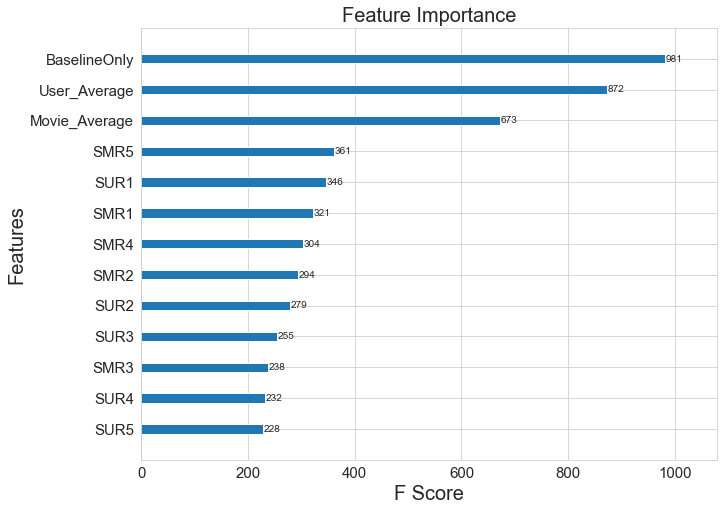

In [146]:
x_train=Train_Reg.drop(["User_ID","Movie_ID","Rating"],axis=1)
x_test=Test_reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
y_train = Train_Reg["Rating"]

y_test = Test_reg["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGBoost_13")

model_train_evaluation["XGBoost_13"] = train_result
model_test_evaluation["XGBoost_13"] = test_result

# Surprise BaselineOnly Model
## Predicted Rating

In [147]:
bsl_options={"method":"sgd","learning_rate":0.01,"n_epochs":25}

algo=BaselineOnly(bsl_options=bsl_options)

train_result,test_result=run_surprise(algo, trainset,testset,"BaselineOnly")

model_train_evaluation["BaselineOnly"]=train_result
model_test_evaluation["BaselineOnly"]=test_result

Estimating biases using sgd...
--------------------------------------------------
TRAIN DATA
RMSE = 0.8811426214928658
MAPE = 27.158727146074078
--------------------------------------------------
TEST DATA
RMSE = 1.0678388468431512
MAPE = 33.39729060309592
--------------------------------------------------
Time Taken = 0:00:00.179576


# XGBoost 13 Features + Surprise BaselineOnly Model

In [148]:
Train_Reg["BaselineOnly"]=model_train_evaluation["BaselineOnly"]["Prediction"]
Train_Reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly
0,180921,4512,3.582804,3.0,2.0,1.0,2.0,1.0,4.0,3.0,4.0,2.0,2.0,2.900000,2.5,1,2.077166
1,210185,4512,3.582804,2.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.388889,2.5,2,2.916411
2,218038,4512,3.582804,2.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,5.0,4.250000,2.5,4,2.905264
3,221936,4512,3.582804,4.0,2.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,3.0,3.458333,2.5,3,3.290933
4,370736,4512,3.582804,2.0,4.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,4.038462,2.5,4,3.561135


In [149]:
print("Number of nan values = "+str(Train_Reg.isnull().sum().sum()))

Number of nan values = 0


In [150]:
Test_reg["BaselineOnly"] = model_test_evaluation["BaselineOnly"]["Prediction"]
Test_reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly
0,464626,4614,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3,3.582804
1,1815614,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3,3.582804
2,2298717,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,5,3.582804
3,2532402,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,4,3.582804
4,2027,4798,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,5,3.582804


In [151]:
print("Number of nan values = "+str(Test_reg.isnull().sum().sum()))

Number of nan values = 0


[11:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


--------------------------------------------------
TRAIN DATA
RMSE = 0.5949516863142196
MAPE = 16.334639489650726
--------------------------------------------------
TEST DATA
RMSE = 1.2562482311411585
MAPE = 30.663328753001164
--------------------------------------------------
Time Taken = 0:00:01.261574


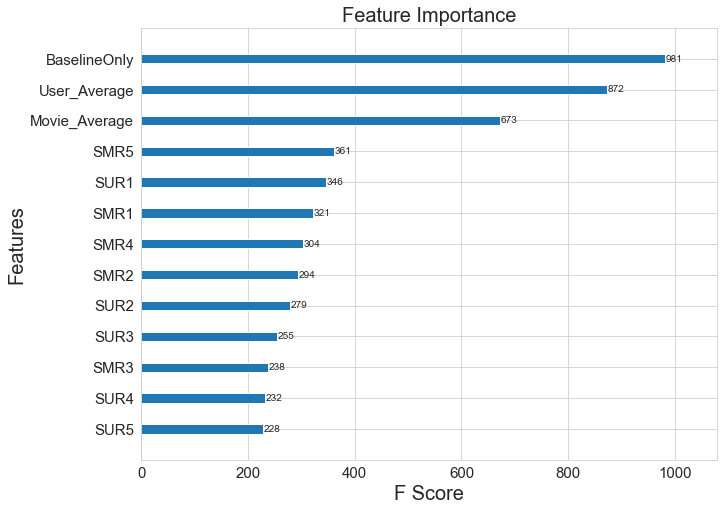

In [152]:
x_train = Train_Reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

x_test = Test_reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

y_train = Train_Reg["Rating"]

y_test = Test_reg["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_BSL")

model_train_evaluation["XGB_BSL"] = train_result
model_test_evaluation["XGB_BSL"] = test_result

# Surprise KNN-Baseline with User-User and Item-Item Similarity

# Surprise KNN-Baseline with User-User.
## Cross- Validation

In [153]:
param_grid  = {'sim_options':{'name': ["pearson_baseline"], "user_based": [True], "min_support": [2], "shrinkage": [60, 80, 80, 140]}, 'k': [5, 20, 40, 80]}

gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

# Applying KNNBaseline User-User with best parameters

In [158]:
sim_options = {'name':'pearson_baseline', 'user_based':True, 'min_support':2, 'shrinkage':gs.best_params['rmse']['sim_options']['shrinkage']}

bsl_options = {'method': 'sgd'} 

algo = KNNBaseline(k = gs.best_params['rmse']['k'], sim_options = sim_options, bsl_options=bsl_options)

train_result, test_result = run_surprise(algo, trainset, testset, "KNNBaseline_User")

model_train_evaluation["KNNBaseline_User"] = train_result
model_test_evaluation["KNNBaseline_User"] = test_result

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
--------------------------------------------------
TRAIN DATA
RMSE = 0.3044975188091617
MAPE = 8.090955152033715
--------------------------------------------------
TEST DATA
RMSE = 1.067654798722828
MAPE = 33.39814334762251
--------------------------------------------------
Time Taken = 0:00:09.800617


# Surprise KNN-Baseline with Item-Item.
## Cross- Validation

In [159]:
param_grid  = {'sim_options':{'name': ["pearson_baseline"], "user_based": [False], "min_support": [2], "shrinkage": [60, 80, 80, 140]}, 'k': [5, 20, 40, 80]}

gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

# Applying KNNBaseline Item-Item with best parameters

In [160]:
sim_options = {'name':'pearson_baseline', 'user_based':False, 'min_support':2, 'shrinkage':gs.best_params['rmse']['sim_options']['shrinkage']}

bsl_options = {'method': 'sgd'} 

algo = KNNBaseline(k = gs.best_params['rmse']['k'], sim_options = sim_options, bsl_options=bsl_options)

train_result, test_result = run_surprise(algo, trainset, testset, "KNNBaseline_Item")

model_train_evaluation["KNNBaseline_Item"] = train_result
model_test_evaluation["KNNBaseline_Item"] = test_result

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
--------------------------------------------------
TRAIN DATA
RMSE = 0.18165138844472184
MAPE = 4.245794665995157
--------------------------------------------------
TEST DATA
RMSE = 1.067654798722828
MAPE = 33.39814334762251
--------------------------------------------------
Time Taken = 0:00:00.651855


# XGBoost 13 Features + Surprise BaselineOnly + Surprise KNN Baseline
## Adding predicted ratings from Surprise KNN Baseline model to our Train and Test Dataframe

In [161]:
Train_Reg["KNNBaseline_User"] = model_train_evaluation["KNNBaseline_User"]["Prediction"]
Train_Reg["KNNBaseline_Item"] = model_train_evaluation["KNNBaseline_Item"]["Prediction"]

Test_reg["KNNBaseline_User"] = model_test_evaluation["KNNBaseline_User"]["Prediction"]
Test_reg["KNNBaseline_Item"] = model_test_evaluation["KNNBaseline_Item"]["Prediction"]

In [162]:
Train_Reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly,KNNBaseline_User,KNNBaseline_Item
0,180921,4512,3.582804,3.0,2.0,1.0,2.0,1.0,4.0,3.0,4.0,2.0,2.0,2.900000,2.5,1,2.077166,1.193482,1.076235
1,210185,4512,3.582804,2.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.388889,2.5,2,2.916411,2.246199,2.014904
2,218038,4512,3.582804,2.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,5.0,4.250000,2.5,4,2.905264,3.727792,3.653776
3,221936,4512,3.582804,4.0,2.0,2.0,1.0,2.0,3.0,4.0,4.0,5.0,3.0,3.458333,2.5,3,3.290933,3.097569,2.961074
4,370736,4512,3.582804,2.0,4.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,4.038462,2.5,4,3.561135,3.042586,3.105870


In [163]:
print("Number of nan values in Train Data "+str(Train_Reg.isnull().sum().sum()))

Number of nan values in Train Data 0


In [165]:
Test_reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,SMR3,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly,KNNBaseline_User,KNNBaseline_Item
0,464626,4614,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3,3.582804,3.582804,3.582804
1,1815614,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3,3.582804,3.582804,3.582804
2,2298717,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,5,3.582804,3.582804,3.582804
3,2532402,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,4,3.582804,3.582804,3.582804
4,2027,4798,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,5,3.582804,3.582804,3.582804


In [167]:
print("Number of nan values in Test Data "+str(Test_reg.isnull().sum().sum()))

Number of nan values in Test Data 0


[12:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


--------------------------------------------------
TRAIN DATA
RMSE = 0.5884776139759752
MAPE = 16.365784406661987
--------------------------------------------------
TEST DATA
RMSE = 1.146172457501923
MAPE = 31.64374059974294
--------------------------------------------------
Time Taken = 0:00:01.265898


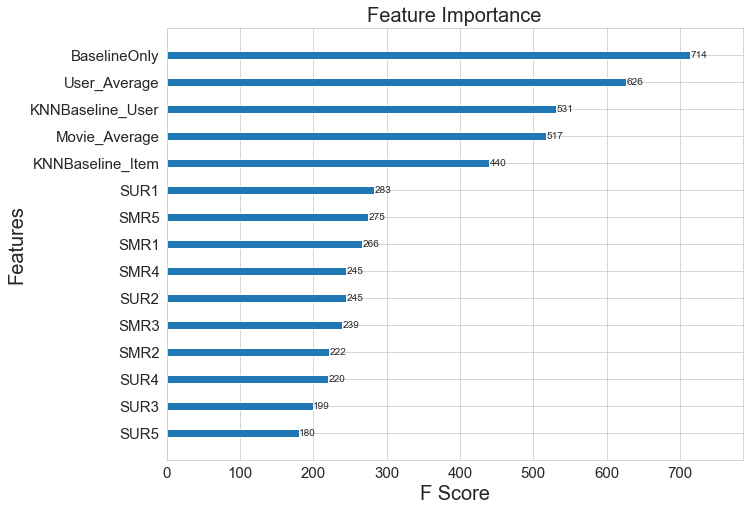

In [169]:
x_train = Train_Reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

x_test = Test_reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

y_train = Train_Reg["Rating"]

y_test = Test_reg["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_BSL_KNN")

model_train_evaluation["XGB_BSL_KNN"] = train_result
model_test_evaluation["XGB_BSL_KNN"] = test_result

## Matrix Factorization SVD

In [170]:
param_grid  = {'n_factors': [5,7,10,15,20,25,35,50,70,90]}   #here, n_factors is the equivalent to dimension 'd' when matrix 'A'
#is broken into 'b' and 'c'. So, matrix 'A' will be of dimension n*m. So, matrices 'b' and 'c' will be of dimension n*d and m*d.

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9928795503593242
{'n_factors': 7}


In [172]:
algo=SVD(n_factors=gs.best_params['rmse']['n_factors'],biased=True,verbose=True)
train_result, test_result = run_surprise(algo, trainset, testset, "SVD")

model_train_evaluation["SVD"] = train_result
model_test_evaluation["SVD"] = test_result

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
--------------------------------------------------
TRAIN DATA
RMSE = 0.8915292018008784
MAPE = 27.929401130209502
--------------------------------------------------
TEST DATA
RMSE = 1.0676633276455576
MAPE = 33.39843901285594
--------------------------------------------------
Time Taken = 0:00:00.419050


# Matrix Factorization SVDpp with implicit feedback

# Cross- Validation

In [173]:
param_grid = {'n_factors': [10, 30, 50, 80, 100], 'lr_all': [0.002, 0.006, 0.018, 0.054, 0.10]}

gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9857877246085246
{'n_factors': 10, 'lr_all': 0.006}


# Applying SVDpp with best parameters

In [174]:
algo = SVDpp(n_factors = gs.best_params['rmse']['n_factors'], lr_all = gs.best_params['rmse']["lr_all"], verbose=True)

train_result, test_result = run_surprise(algo, trainset, testset, "SVDpp")

model_train_evaluation["SVDpp"] = train_result
model_test_evaluation["SVDpp"] = test_result

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
--------------------------------------------------
TRAIN DATA
RMSE = 0.793069836701297
MAPE = 24.331089234704926
--------------------------------------------------
TEST DATA
RMSE = 1.0676735672268267
MAPE = 33.3956791755603
--------------------------------------------------
Time Taken = 0:00:04.232203


# XGBoost 13 Features + Surprise BaselineOnly + Surprise KNN Baseline + SVD + SVDpp

In [176]:
Train_Reg["SVD"] = model_train_evaluation["SVD"]["Prediction"]
Train_Reg["SVDpp"] = model_train_evaluation["SVDpp"]["Prediction"]

Test_reg["SVD"] = model_test_evaluation["SVD"]["Prediction"]
Test_reg["SVDpp"] = model_test_evaluation["SVDpp"]["Prediction"]

In [177]:
Train_Reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,...,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly,KNNBaseline_User,KNNBaseline_Item,SVD,SVDpp
0,180921,4512,3.582804,3.0,2.0,1.0,2.0,1.0,4.0,3.0,...,2.0,2.0,2.900000,2.5,1,2.077166,1.193482,1.076235,2.237030,2.231730
1,210185,4512,3.582804,2.0,1.0,3.0,3.0,4.0,3.0,3.0,...,4.0,4.0,3.388889,2.5,2,2.916411,2.246199,2.014904,3.050194,2.752852
2,218038,4512,3.582804,2.0,3.0,3.0,2.0,4.0,4.0,4.0,...,3.0,5.0,4.250000,2.5,4,2.905264,3.727792,3.653776,3.037636,3.159202
3,221936,4512,3.582804,4.0,2.0,2.0,1.0,2.0,3.0,4.0,...,5.0,3.0,3.458333,2.5,3,3.290933,3.097569,2.961074,3.443622,3.291811
4,370736,4512,3.582804,2.0,4.0,1.0,2.0,2.0,4.0,4.0,...,4.0,5.0,4.038462,2.5,4,3.561135,3.042586,3.105870,3.806972,3.495492


In [178]:
print("Number of nan values in Train Data "+str(Train_Reg.isnull().sum().sum()))

Number of nan values in Train Data 0


In [179]:
Test_reg.head()

,User_ID,Movie_ID,Global_Average,SUR1,SUR2,SUR3,SUR4,SUR5,SMR1,SMR2,...,SMR4,SMR5,User_Average,Movie_Average,Rating,BaselineOnly,KNNBaseline_User,KNNBaseline_Item,SVD,SVDpp
0,464626,4614,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,...,3.582804,3.582804,3.582804,3.582804,3,3.582804,3.582804,3.582804,3.582804,3.582804
1,1815614,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,...,3.582804,3.582804,3.582804,3.582804,3,3.582804,3.582804,3.582804,3.582804,3.582804
2,2298717,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,...,3.582804,3.582804,3.582804,3.582804,5,3.582804,3.582804,3.582804,3.582804,3.582804
3,2532402,4627,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,...,3.582804,3.582804,3.582804,3.582804,4,3.582804,3.582804,3.582804,3.582804,3.582804
4,2027,4798,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,3.582804,...,3.582804,3.582804,3.582804,3.582804,5,3.582804,3.582804,3.582804,3.582804,3.582804


In [181]:
print("Number of nan values in Test Data "+str(Test_reg.isnull().sum().sum()))

Number of nan values in Test Data 0


[12:36:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


--------------------------------------------------
TRAIN DATA
RMSE = 0.5828093439473843
MAPE = 16.276511549949646
--------------------------------------------------
TEST DATA
RMSE = 1.129455324311166
MAPE = 31.89130551607692
--------------------------------------------------
Time Taken = 0:00:01.383285


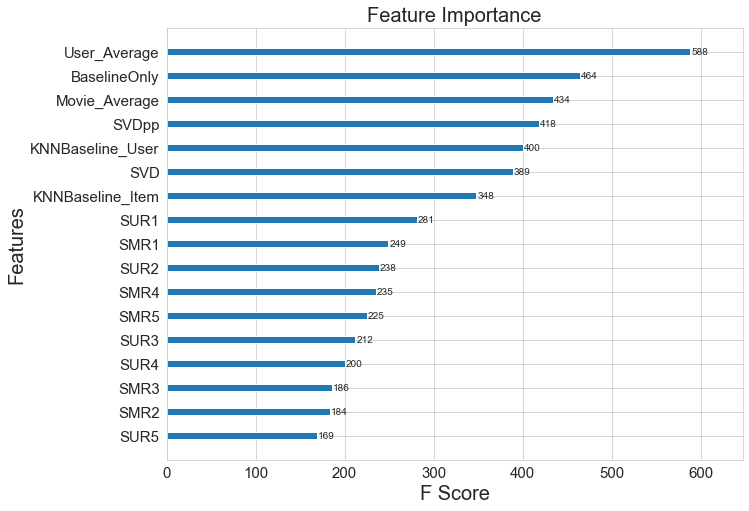

In [183]:
x_train = Train_Reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

x_test = Test_reg.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

y_train = Train_Reg["Rating"]

y_test = Test_reg["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_BSL_KNN_MF")

model_train_evaluation["XGB_BSL_KNN_MF"] = train_result
model_test_evaluation["XGB_BSL_KNN_MF"] = test_result

# Surprise KNN Baseline + SVD + SVDpp

[12:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


--------------------------------------------------
TRAIN DATA
RMSE = 0.9222947113371508
MAPE = 29.60980534553528
--------------------------------------------------
TEST DATA
RMSE = 1.0746159984412627
MAPE = 33.245188892751834
--------------------------------------------------
Time Taken = 0:00:01.092106


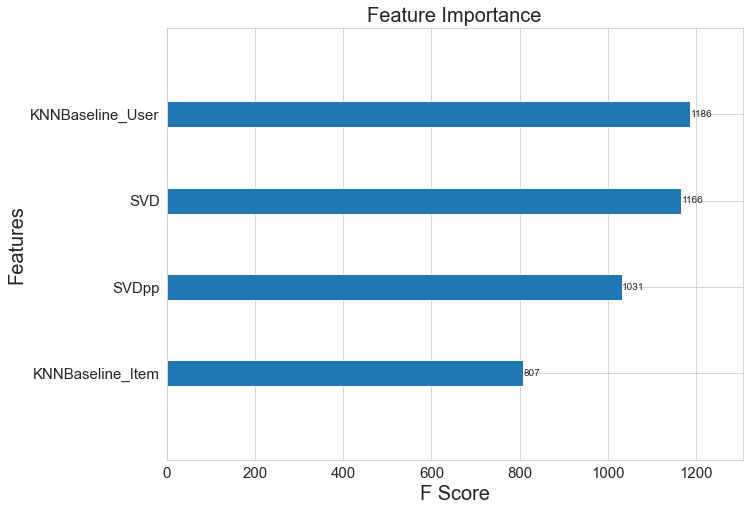

In [184]:
x_train = Train_Reg[["KNNBaseline_User", "KNNBaseline_Item", "SVD", "SVDpp"]]

x_test = Test_reg[["KNNBaseline_User", "KNNBaseline_Item", "SVD", "SVDpp"]]

y_train = Train_Reg["Rating"]

y_test = Test_reg["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_KNN_MF")

model_train_evaluation["XGB_KNN_MF"] = train_result
model_test_evaluation["XGB_KNN_MF"] = test_result

In [185]:
error_table2 = error_table.drop(["Train MAPE", "Test MAPE"], axis = 1)

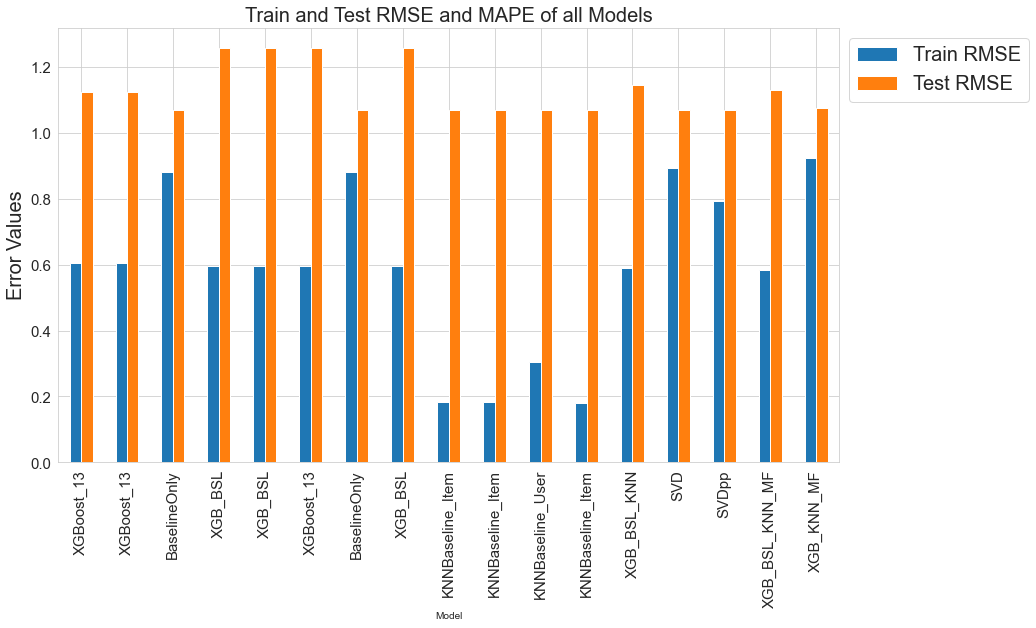

In [186]:
error_table2.plot(x = "Model", kind = "bar", figsize = (14, 8), grid = True, fontsize = 15)
plt.title("Train and Test RMSE and MAPE of all Models", fontsize = 20)
plt.ylabel("Error Values", fontsize = 20)
plt.legend(bbox_to_anchor=(1, 1), fontsize = 20)
plt.show()

In [187]:
error_table.drop(["Train MAPE", "Test MAPE"], axis = 1).style.highlight_min(axis=0)

,Model,Train RMSE,Test RMSE
0,XGBoost_13,0.605147,1.122649
1,XGBoost_13,0.605147,1.122649
2,BaselineOnly,0.881143,1.067839
3,XGB_BSL,0.594952,1.256248
4,XGB_BSL,0.594952,1.256248
5,XGBoost_13,0.594952,1.256248
6,BaselineOnly,0.881143,1.067839
7,XGB_BSL,0.594952,1.256248
8,KNNBaseline_Item,0.181882,1.067655
9,KNNBaseline_Item,0.181882,1.067655


# So, far our best model is SVDpp with Test RMSE of 1.067583